# car price prediction project

importing needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

# CHECKING THE DATA ROWS AND COLUMNS

In [2]:
df=pd.read_csv("carproject.csv")

In [3]:
df

Unnamed: 0 BRAND-TITLE  MANUFACTURING_YEAR CAR_PRICE  \
0              0      Maruti                2017  4,52,000   
1              1     Hyundai                2019  4,76,500   
2              2     Renault                2017  2,72,000   
3              3      Maruti                2019  3,58,000   
4              4     Hyundai                2016  2,84,000   
...          ...         ...                 ...       ...   
5094        5094    Mahindra                2006  2,30,000   
5095        5095  Volkswagen                2013  2,35,000   
5096        5096      Maruti                2016  3,00,000   
5097        5097     Hyundai                2017  4,85,000   
5098        5098     Renault                2012  3,35,000   

     running_distance_KM TYPE_FUEL GEAR_MODEL  
0             34,897 kms    Petrol     manual  
1              2,007 kms    Petrol     manual  
2             37,012 kms    Petrol     manual  
3             43,060 kms    Petrol     manual  
4             30,229 kms    Petrol     manual  
...                  ...       ...        ...  
5094        1,20,000 kms    Diesel     manual  
5095        1,40,000 kms    Diesel     manual  
5096        1,70,000 kms    Petrol     manual  
5097           5,000 kms    Petrol     manual  
5098        1,04,429 kms    Diesel     manual  

[5099 rows x 7 columns]

In [4]:
df.columns

Index(['Unnamed: 0', 'BRAND-TITLE', 'MANUFACTURING_YEAR', 'CAR_PRICE',
       'running_distance_KM', 'TYPE_FUEL', 'GEAR_MODEL'],
      dtype='object')

datahas 5099 rows and 7 columns the different columns are 'Unnamed: 0', 'BRAND-TITLE', 'MANUFACTURING_YEAR',
'CAR_PRICE','running_distance_KM', 'TYPE_FUEL', 'GEAR_MODEL

In [5]:
df.shape

(5099, 7)

(5099, 7) is the shape of  data set

In [6]:
df.head()

Unnamed: 0 BRAND-TITLE  MANUFACTURING_YEAR CAR_PRICE running_distance_KM  \
0           0      Maruti                2017  4,52,000          34,897 kms   
1           1     Hyundai                2019  4,76,500           2,007 kms   
2           2     Renault                2017  2,72,000          37,012 kms   
3           3      Maruti                2019  3,58,000          43,060 kms   
4           4     Hyundai                2016  2,84,000          30,229 kms   

  TYPE_FUEL GEAR_MODEL  
0    Petrol     manual  
1    Petrol     manual  
2    Petrol     manual  
3    Petrol     manual  
4    Petrol     manual

data head giving an idea about the dataset

In [7]:
df.tail()

Unnamed: 0 BRAND-TITLE  MANUFACTURING_YEAR CAR_PRICE  \
5094        5094    Mahindra                2006  2,30,000   
5095        5095  Volkswagen                2013  2,35,000   
5096        5096      Maruti                2016  3,00,000   
5097        5097     Hyundai                2017  4,85,000   
5098        5098     Renault                2012  3,35,000   

     running_distance_KM TYPE_FUEL GEAR_MODEL  
5094        1,20,000 kms    Diesel     manual  
5095        1,40,000 kms    Diesel     manual  
5096        1,70,000 kms    Petrol     manual  
5097           5,000 kms    Petrol     manual  
5098        1,04,429 kms    Diesel     manual

In [8]:
df.dtypes

Unnamed: 0              int64
BRAND-TITLE            object
MANUFACTURING_YEAR      int64
CAR_PRICE              object
running_distance_KM    object
TYPE_FUEL              object
GEAR_MODEL             object
dtype: object

most of the columns are in object datatype except manufacturing year.so encoding is needed

In [9]:
df.isnull().sum()

Unnamed: 0             0
BRAND-TITLE            0
MANUFACTURING_YEAR     0
CAR_PRICE              0
running_distance_KM    0
TYPE_FUEL              0
GEAR_MODEL             0
dtype: int64

no data columns contains null values

<AxesSubplot:>

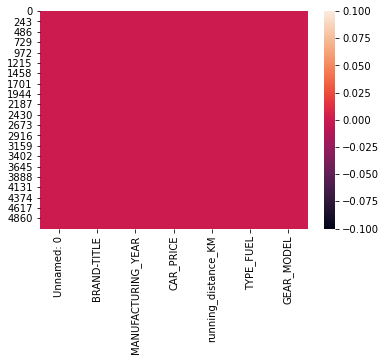

In [10]:
sns.heatmap(df.isnull())

plot clearley shows the absence of null value

# EDA

# ANALYSING TARGET VARIABLE

In [11]:
df['CAR_PRICE']

0       4,52,000
1       4,76,500
2       2,72,000
3       3,58,000
4       2,84,000
          ...   
5094    2,30,000
5095    2,35,000
5096    3,00,000
5097    4,85,000
5098    3,35,000
Name: CAR_PRICE, Length: 5099, dtype: object

THE CAR_PRICE CONSIST of CONTINEOUS VALUES SO FOR ANALYSIS WE HAVE TO IMPLEMENT REGRESSION METHODS

# FEATURE COLUMNS:UNIVARIATE ANALYSIS

# COUNT PLOTS

# BRAND-TITLE

Maruti           2055
Hyundai          1117
Honda             375
Tata              308
Renault           237
Mahindra          215
Ford              177
Volkswagen        144
Toyota            143
Chevrolet         114
Datsun             68
Skoda              64
Nissan             43
Fiat               23
Mitsubishi          5
OpelCorsa           2
Force               2
BMW                 2
Mercedes-Benz       2
Ambassador          1
Ashok               1
Reva                1
Name: BRAND-TITLE, dtype: int64


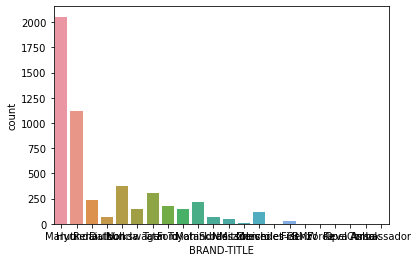

In [12]:
sns.countplot(df['BRAND-TITLE'])
print(df["BRAND-TITLE"].value_counts())

HOWEVER BENZ,AMBASSADOR,ASHOK ARE THE LEAST IN LIST

# MANUFACTURING_YEAR

2013    610
2015    575
2014    570
2016    530
2012    507
2011    440
2017    416
2010    284
2018    283
2009    193
2008    160
2007    139
2019    138
2020     70
2006     42
2005     32
2021     31
2004     19
2003     16
2002     14
2000      8
2001      6
1997      5
1999      3
1995      1
1992      1
1991      1
1998      1
1994      1
1996      1
1981      1
1990      1
Name: MANUFACTURING_YEAR, dtype: int64


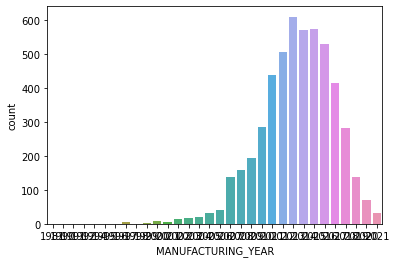

In [13]:
sns.countplot(df['MANUFACTURING_YEAR'])
print(df["MANUFACTURING_YEAR"].value_counts())

# running_distance_KM 

1,20,000 kms    277
70,000 kms      243
80,000 kms      239
90,000 kms      216
60,000 kms      175
               ... 
87,015 kms        1
24,000 kms        1
1,12,258 kms      1
54,045 kms        1
43,904 kms        1
Name: running_distance_KM, Length: 1754, dtype: int64


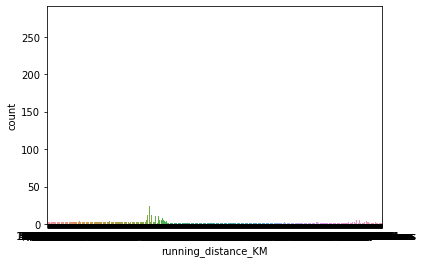

In [14]:
sns.countplot(df['running_distance_KM'])
print(df["running_distance_KM"].value_counts())

running_distance_KM  PLOT IS SHOWN ABOVE

# TYPE_FUEL

Petrol               3294
Diesel               1654
CNG                   116
LPG                    33
Electric(Battery)       2
Name: TYPE_FUEL, dtype: int64


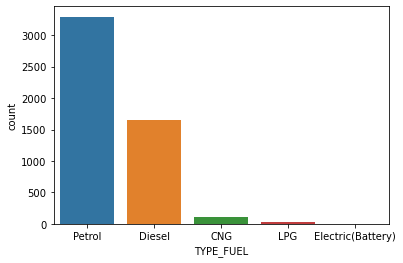

In [15]:
sns.countplot(df['TYPE_FUEL'])
print(df["TYPE_FUEL"].value_counts())

MOST OF THE VEHICLES IN THE DATASET USING PETROL AS FUEL, QUARTER OF THEM USING DIESEL ALSO,CNG,LPG,BATTERY ARE ALSO THERE 

# GEAR_MODEL

manual       4743
automatic     356
Name: GEAR_MODEL, dtype: int64


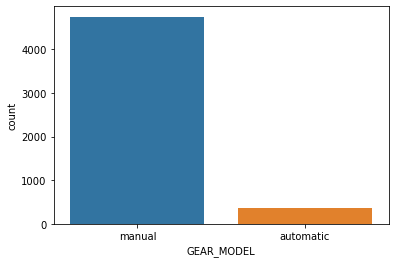

In [16]:
sns.countplot(df['GEAR_MODEL'])
print(df["GEAR_MODEL"].value_counts())

MOST OF THE CARS ARE RUNNING WITH MANNUAL GEAR, SOME POF THEM ARE(356)IN AUTOMATIC SYSTEM

# Bivariate Analysis

<AxesSubplot:title={'center':'comparison of Title AND Price'}, xlabel='BRAND-TITLE', ylabel='CAR_PRICE'>

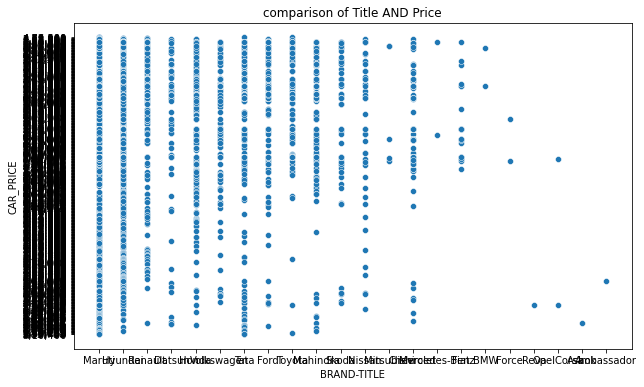

In [17]:
plt.figure(figsize=[10,6])
plt.title('comparison of Title AND Price')
sns.scatterplot(df['BRAND-TITLE'],df['CAR_PRICE'])

from figure it is clear that some brands are only producing high values car,but some brands like maruthi,hundai are making all category 

<AxesSubplot:title={'center':'comparison of Title AND gear'}, xlabel='BRAND-TITLE', ylabel='GEAR_MODEL'>

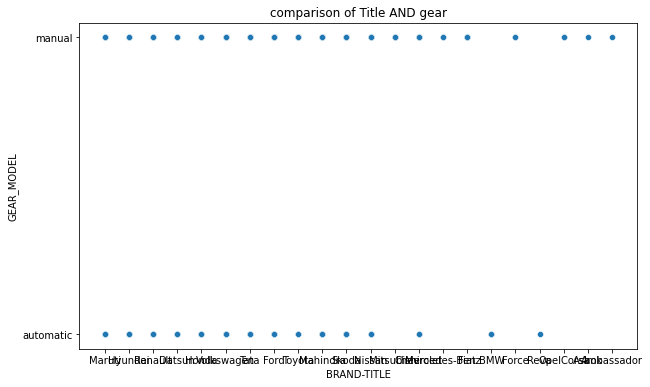

In [18]:
plt.figure(figsize=[10,6])
plt.title('comparison of Title AND gear')
sns.scatterplot(df['BRAND-TITLE'],df['GEAR_MODEL'])

most of the brands producing both mannual and automatic cars.some brands like ambassador ,only producing mannual models

<AxesSubplot:title={'center':'comparison of year AND gear'}, xlabel='MANUFACTURING_YEAR', ylabel='GEAR_MODEL'>

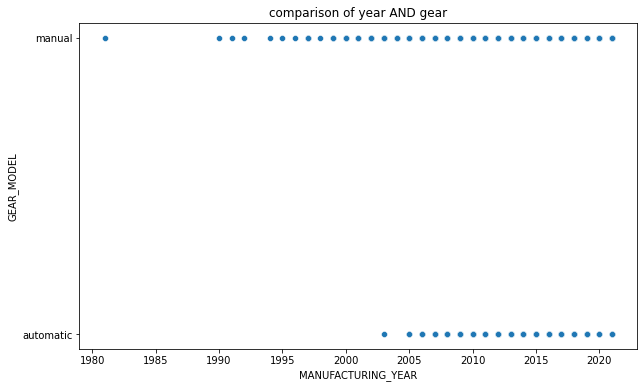

In [19]:
plt.figure(figsize=[10,6])
plt.title('comparison of year AND gear')
sns.scatterplot(df['MANUFACTURING_YEAR'],df['GEAR_MODEL'])

from comparison it is clear that in earley times like before 2000 there is no automatic cars

<AxesSubplot:title={'center':'comparison of year AND fuel'}, xlabel='MANUFACTURING_YEAR', ylabel='TYPE_FUEL'>

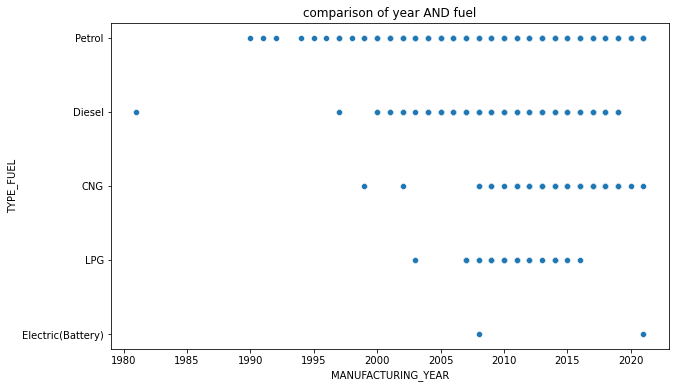

In [20]:
plt.figure(figsize=[10,6])
plt.title('comparison of year AND fuel')
sns.scatterplot(df['MANUFACTURING_YEAR'],df['TYPE_FUEL'])

petrol is common in all years but lpg battery are introduced recently

# CHECKING OUTLIERS

<AxesSubplot:xlabel='MANUFACTURING_YEAR'>

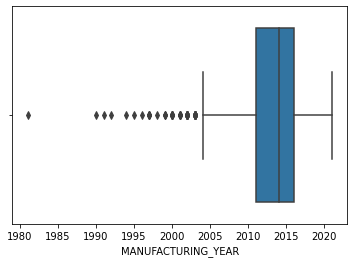

In [21]:
sns.boxplot(df['MANUFACTURING_YEAR'])

MANUFACTURING_YEAR has outlier presence in the boxplot,we have to remove outlier from it

# DATA PREPROCESSING

dataset consisting an unwanted column named Unnamed: 0 manually dropping that column as a part of data cleaning

In [22]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [23]:
df

BRAND-TITLE  MANUFACTURING_YEAR CAR_PRICE running_distance_KM TYPE_FUEL  \
0         Maruti                2017  4,52,000          34,897 kms    Petrol   
1        Hyundai                2019  4,76,500           2,007 kms    Petrol   
2        Renault                2017  2,72,000          37,012 kms    Petrol   
3         Maruti                2019  3,58,000          43,060 kms    Petrol   
4        Hyundai                2016  2,84,000          30,229 kms    Petrol   
...          ...                 ...       ...                 ...       ...   
5094    Mahindra                2006  2,30,000        1,20,000 kms    Diesel   
5095  Volkswagen                2013  2,35,000        1,40,000 kms    Diesel   
5096      Maruti                2016  3,00,000        1,70,000 kms    Petrol   
5097     Hyundai                2017  4,85,000           5,000 kms    Petrol   
5098     Renault                2012  3,35,000        1,04,429 kms    Diesel   

     GEAR_MODEL  
0        manual  
1        manual  
2        manual  
3        manual  
4        manual  
...         ...  
5094     manual  
5095     manual  
5096     manual  
5097     manual  
5098     manual  

[5099 rows x 6 columns]

# ENCODING

MOST OF THE COLUMNS ARE OBJECT DATATYPE SO NOW ENCODING THOSE DATA COLUMNS

In [24]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [25]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [26]:
df

BRAND-TITLE  MANUFACTURING_YEAR  CAR_PRICE  running_distance_KM  \
0            11.0                2017      650.0                668.0   
1             9.0                2019      700.0                357.0   
2            16.0                2017      230.0                715.0   
3            11.0                2019      428.0                849.0   
4             9.0                2016      265.0                583.0   
...           ...                 ...        ...                  ...   
5094         10.0                2006      139.0                103.0   
5095         21.0                2013      149.0                152.0   
5096         11.0                2016      310.0                185.0   
5097          9.0                2017      716.0                968.0   
5098         16.0                2012      380.0                 31.0   

      TYPE_FUEL  GEAR_MODEL  
0           4.0         1.0  
1           4.0         1.0  
2           4.0         1.0  
3           4.0         1.0  
4           4.0         1.0  
...         ...         ...  
5094        1.0         1.0  
5095        1.0         1.0  
5096        4.0         1.0  
5097        4.0         1.0  
5098        1.0         1.0  

[5099 rows x 6 columns]

# Multivariate Analysis

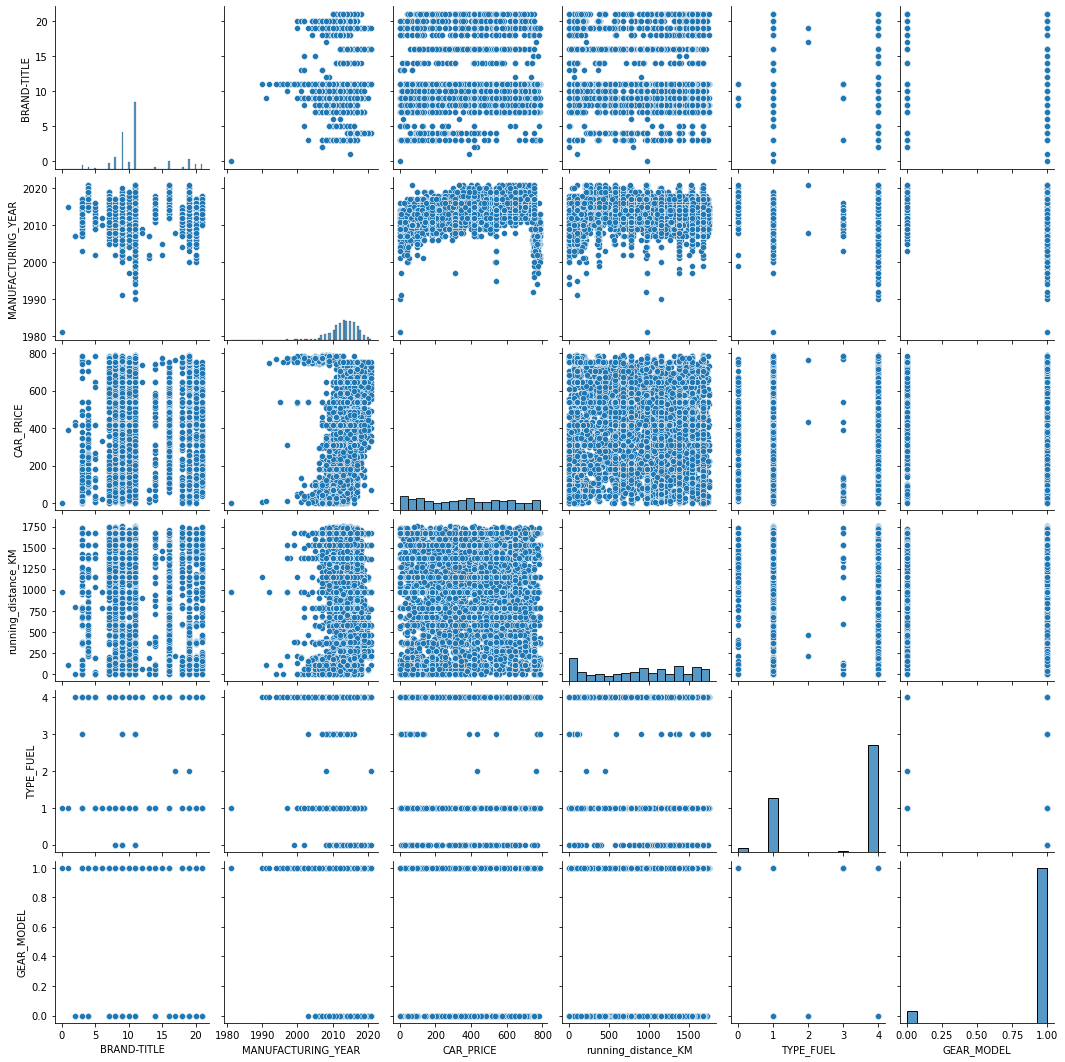

In [27]:
sns.pairplot(df)

pair plot clearley showing the comparison mong the different columns

In [28]:
df.describe()

BRAND-TITLE  MANUFACTURING_YEAR    CAR_PRICE  running_distance_KM  \
count  5099.000000         5099.000000  5099.000000          5099.000000   
mean     11.220043         2013.354972   375.690331           882.292803   
std       3.905642            3.563180   232.475539           546.534394   
min       0.000000         1981.000000     0.000000             0.000000   
25%       9.000000         2011.000000   171.000000           372.000000   
50%      11.000000         2014.000000   380.000000           968.000000   
75%      11.000000         2016.000000   575.000000          1376.000000   
max      21.000000         2021.000000   788.000000          1753.000000   

         TYPE_FUEL   GEAR_MODEL  
count  5099.000000  5099.000000  
mean      2.928613     0.930182  
std       1.464234     0.254864  
min       0.000000     0.000000  
25%       1.000000     1.000000  
50%       4.000000     1.000000  
75%       4.000000     1.000000  
max       4.000000     1.000000

# CORRELATION CHECKING

In [29]:
cor=df.corr()

In [30]:
cor

BRAND-TITLE  MANUFACTURING_YEAR  CAR_PRICE  \
BRAND-TITLE             1.000000            0.007805   0.030685   
MANUFACTURING_YEAR      0.007805            1.000000   0.332590   
CAR_PRICE               0.030685            0.332590   1.000000   
running_distance_KM    -0.066452           -0.023211  -0.001726   
TYPE_FUEL              -0.135997            0.091519  -0.047742   
GEAR_MODEL             -0.013137           -0.064720  -0.123594   

                     running_distance_KM  TYPE_FUEL  GEAR_MODEL  
BRAND-TITLE                    -0.066452  -0.135997   -0.013137  
MANUFACTURING_YEAR             -0.023211   0.091519   -0.064720  
CAR_PRICE                      -0.001726  -0.047742   -0.123594  
running_distance_KM             1.000000  -0.004831   -0.004888  
TYPE_FUEL                      -0.004831   1.000000   -0.138458  
GEAR_MODEL                     -0.004888  -0.138458    1.000000

# HEATMAP

<AxesSubplot:>

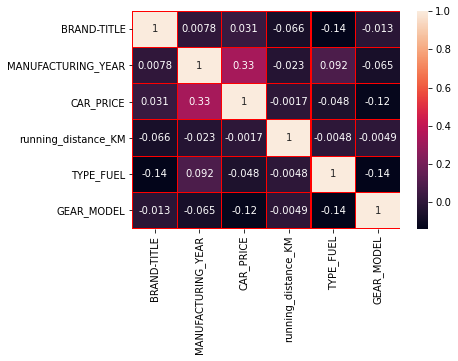

In [31]:
sns.heatmap(cor,annot=True,linewidth=0.1,linecolor='r')

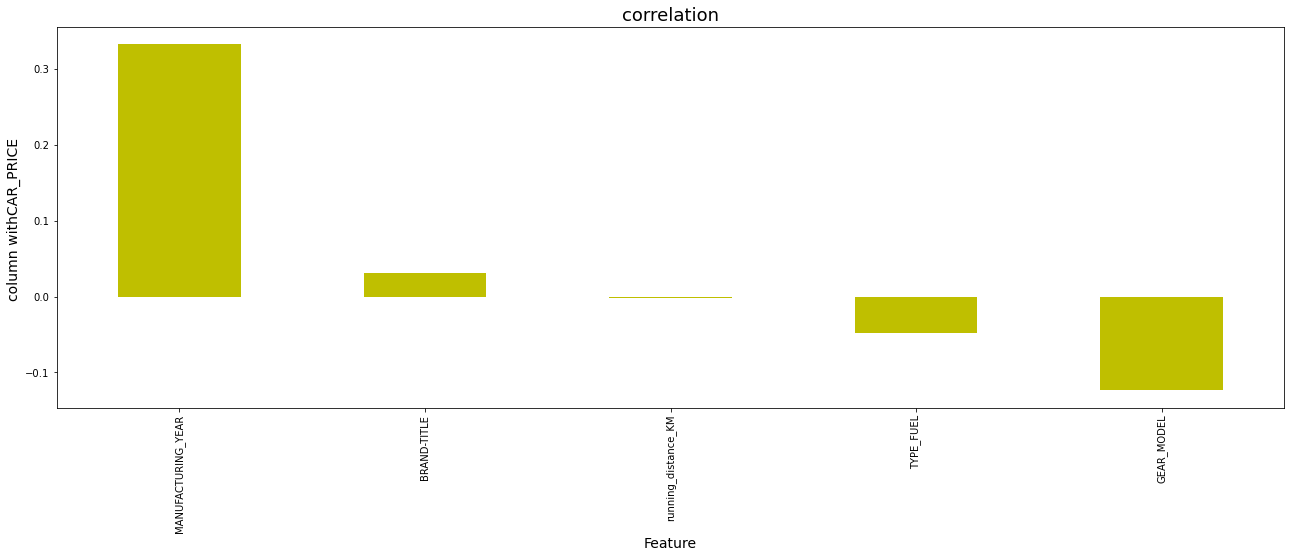

In [32]:
plt.figure(figsize=(22,7))
cor['CAR_PRICE'].sort_values(ascending=False).drop(['CAR_PRICE']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column withCAR_PRICE ',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

figure shows the correlation status of each column to the target

# OUTLIER REMOVAL

In [33]:
from scipy.stats import zscore

In [34]:
z=np.abs(zscore(df))

In [35]:
new_df=df[(z<3).all(axis=1)]

In [36]:
new_df.shape

(4699, 6)

In [37]:
df.shape

(5099, 6)

loss is very less so we can proceed to further steps

# SKEWNESS CHECK

after removing outliers we have to check the skewness of data

In [38]:
new_df.skew()

BRAND-TITLE            0.954221
MANUFACTURING_YEAR    -0.335238
CAR_PRICE              0.103323
running_distance_KM   -0.160739
TYPE_FUEL             -0.585636
GEAR_MODEL             0.000000
dtype: float64

BRAND-TITLE and TYPE_FUEL showing skewness presence,,can check this with histogram

<AxesSubplot:ylabel='Frequency'>

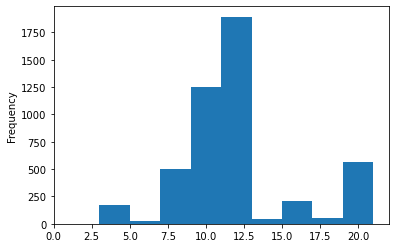

In [39]:
new_df['BRAND-TITLE'].plot.hist()

 BRAND_TITLE has positive skewness.

<AxesSubplot:ylabel='Frequency'>

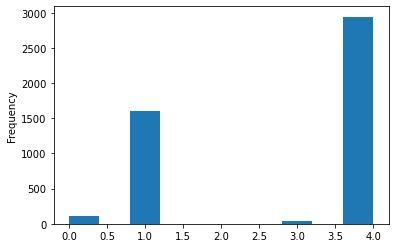

In [40]:
new_df['TYPE_FUEL'].plot.hist()

TYPE_FUEL has negative skewness

# REMOVING SKEWNESS-POWER TRANSFORM

# SEPARATING COLUMNS FOR X AND Y

In [41]:
x=new_df.drop("CAR_PRICE",axis=1)
y=new_df["CAR_PRICE"]

In [42]:
from sklearn.preprocessing import PowerTransformer

In [43]:
pt=PowerTransformer(method="yeo-johnson")

In [44]:
X_power=pt.fit_transform(x)

In [45]:
new_df=pd.DataFrame(X_power,columns=x.columns)

In [46]:
new_df.skew()

BRAND-TITLE            0.044400
MANUFACTURING_YEAR    -0.132414
running_distance_KM   -0.494459
TYPE_FUEL             -0.554955
GEAR_MODEL             0.000000
dtype: float64

# MULTICOLLINEARITY

VIF HELP TO FIND THE MULTICOLLINEARITY

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [49]:
vif_calc()

      VIF Factor             Features
0       1.023282          BRAND-TITLE
1       1.010367   MANUFACTURING_YEAR
2       1.004694  running_distance_KM
3       1.029039            TYPE_FUEL
4  381220.190963           GEAR_MODEL


BY ANALYSING VIF VALUE MANUALLY DROPPING ONE COLUMN  GEAR_MODEL

In [50]:
x.drop(['GEAR_MODEL'],axis=1,inplace=True)

In [51]:
x

BRAND-TITLE  MANUFACTURING_YEAR  running_distance_KM  TYPE_FUEL
0            11.0                2017                668.0        4.0
1             9.0                2019                357.0        4.0
2            16.0                2017                715.0        4.0
3            11.0                2019                849.0        4.0
4             9.0                2016                583.0        4.0
...           ...                 ...                  ...        ...
5094         10.0                2006                103.0        1.0
5095         21.0                2013                152.0        1.0
5096         11.0                2016                185.0        4.0
5097          9.0                2017                968.0        4.0
5098         16.0                2012                 31.0        1.0

[4699 rows x 4 columns]

# SCALING FEATURES

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
sc=StandardScaler()

In [54]:
x=sc.fit_transform(x)

# SPLITTING AND APPLYING ALGORITHMS

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)

In [57]:
x_train.shape

(3289, 4)

In [58]:
x_test.shape

(1410, 4)

In [59]:
y_train.shape

(3289,)

In [60]:
y_test.shape

(1410,)

# LINEAR REGRESSION

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [63]:
lm=LinearRegression()

In [64]:
lm.fit(x_train,y_train)

LinearRegression()

In [65]:
pred=lm.predict(x_test)

In [66]:
print(pred)

[482.75004107 364.40754154 320.89463448 ... 222.13964679 301.59461456
 383.77803305]


# ERROR CALCULATIONS

In [67]:
print("mean absolute error:",mean_absolute_error(y_test,pred))

mean absolute error: 176.40360265176608


In [68]:
print("mean squred error:",mean_squared_error(y_test,pred))

mean squred error: 46506.13828293443


In [69]:
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

root mean squared error: 215.6528188615545


# r2 score

In [70]:
from sklearn.metrics import r2_score

In [71]:
lmscore=r2_score(y_test,pred)

In [72]:
print(lmscore)

0.1484202168456229


# SUPPORT VECTOR REGRESSOR

In [73]:
from sklearn.svm import SVR

In [74]:
svr=SVR(kernel="linear")

In [75]:
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [76]:
svrpred=svr.predict(x_test)

In [77]:
print(svrpred)

[520.68264078 341.47543271 287.39438746 ... 129.12400269 243.02503903
 374.10031432]


# ERROR CALCULATIONS

In [78]:
print("mean absolute error:",mean_absolute_error(y_test,svrpred))

mean absolute error: 170.318743370973


In [79]:
print("mean squred error:",mean_squared_error(y_test,svrpred))

mean squred error: 49383.96335750991


In [80]:
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,svrpred)))

root mean squared error: 222.22502864778735


# R2 SCORE

In [81]:
svrscore=r2_score(y_test,svrpred)

In [82]:
print(svrscore)

0.09572399773463935


# DECISION TREE REGRESSOR

In [83]:
from sklearn.tree import DecisionTreeRegressor

In [84]:
dtr=DecisionTreeRegressor()

In [85]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [86]:
dtrpred=dtr.predict(x_test)

In [87]:
print(dtrpred)

[356.         180.          67.         ...  26.66666667 435.
 216.        ]


# ERROR VALUES

In [88]:
print("mean absolute error:",mean_absolute_error(y_test,dtrpred))

mean absolute error: 151.37180006754477


In [89]:
print("mean squred error:",mean_squared_error(y_test,dtrpred))

mean squred error: 53018.25581872276


In [90]:
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,dtrpred)))

root mean squared error: 230.2569343553474


# R2 SCORE

In [91]:
dtrscore=r2_score(y_test,dtrpred)

In [92]:
print(dtrscore)

0.029176008580809487


# K-neighbor regressor

In [93]:
from sklearn.neighbors import KNeighborsRegressor

In [94]:
knnr=KNeighborsRegressor()

In [95]:
knnr.fit(x_train,y_train)

KNeighborsRegressor()

In [96]:
knnrpred=knnr.predict(x_test)

In [97]:
print(knnrpred)

[457.6 346.6 267.2 ...  29.6 169.2 367.4]


# ERROR CALCULATION

In [98]:
print("mean absolute error:",mean_absolute_error(y_test,knnrpred))

mean absolute error: 155.42879432624113


In [99]:
print("mean squred error:",mean_squared_error(y_test,knnrpred))

mean squred error: 42207.78590070923


In [100]:
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,knnrpred)))

root mean squared error: 205.44533555354627


# R2 SCORE

In [101]:
knnrscore=r2_score(y_test,knnrpred)

In [102]:
print(knnrscore)

0.22712789124566302


# CROSS VALIDATION MEAN SCORE

In [103]:
from sklearn.model_selection import cross_val_score

In [104]:
print(cross_val_score(lm,x,y,cv=5).mean())

0.1295573539461889


In [105]:
print(cross_val_score(svr,x,y,cv=5).mean())

0.07933141894017752


In [106]:
print(cross_val_score(dtr,x,y,cv=5).mean())

0.043378173600735793


In [107]:
print(cross_val_score(knnr,x,y,cv=5).mean())

0.23257419186085643


by comparing r2 scores and cross validation mean score selecting KNN For further proceedings

# HYPER PARAMETER TUNING FOR KNN

In [108]:
from sklearn.model_selection import GridSearchCV

In [111]:
parameter={'n_neighbors':np.arange(2,10),
          'weights':['uniform','distance'],
          'algorithm':['auto','ball_tree','kd_tree','brute'],'leaf_size':[5,10,15]}

In [112]:
GCV=GridSearchCV(KNeighborsRegressor(),parameter,cv=5)

In [113]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [5, 10, 15],
                         'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

In [114]:
GCV.best_params_

{'algorithm': 'auto', 'leaf_size': 15, 'n_neighbors': 9, 'weights': 'uniform'}

PASSING THIS BEST PARAMETER VALUES TO MODEL

In [116]:
Car_model=KNeighborsRegressor(algorithm ='auto', n_neighbors = 9, weights = 'uniform',leaf_size = 15)

In [117]:
Car_model.fit(x_train,y_train)

KNeighborsRegressor(leaf_size=15, n_neighbors=9)

In [118]:
Finalpred=Car_model.predict(x_test)

In [119]:
Finalr2score=r2_score(y_test,Finalpred)

In [120]:
print(Finalr2score)

0.25567783365766816


# saving and conclusion of model

In [121]:
Finalconclusion=pd.DataFrame([Car_model.predict(x_test)[:],Finalpred[:]],index=["Predicted","Orginal"])

In [122]:
Finalconclusion

0           1           2           3           4     \
Predicted  481.777778  274.222222  289.222222  376.777778  519.777778   
Orginal    481.777778  274.222222  289.222222  376.777778  519.777778   

                 5           6      7          8           9     ...  \
Predicted  399.888889  125.555556  461.0  72.888889  379.555556  ...   
Orginal    399.888889  125.555556  461.0  72.888889  379.555556  ...   

                 1400        1401   1402        1403        1404        1405  \
Predicted  465.333333  135.555556  104.0  505.888889  476.888889  203.444444   
Orginal    465.333333  135.555556  104.0  505.888889  476.888889  203.444444   

            1406       1407   1408        1409  
Predicted  388.0  59.666667  197.0  406.444444  
Orginal    388.0  59.666667  197.0  406.444444  

[2 rows x 1410 columns]

# SAVING

In [123]:
import joblib

In [124]:
joblib.dump(Car_model,"Car_model.obj")

['Car_model.obj']